In [1]:
import pandas as pd

In [12]:
df = pd.read_excel("hn_realestate_full.xlsx")

In [13]:
predict_df = df[['Road_width (m)', 'Area (m2)', 'Price (Millions vnd/m2)', 
                 'District Population (Thousands)','District Density (people/km2)', 
                 'Distance from center(km)', 'Distance from nearest road (km)']]
predict_df.dropna(axis=0,inplace=True)
predict_df

<ipython-input-13-77cddd38ee35>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_df.dropna(axis=0,inplace=True)


,Road_width (m),Area (m2),Price (Millions vnd/m2),District Population (Thousands),District Density (people/km2),Distance from center(km),Distance from nearest road (km)
0,5.0,32.0,562.500000,267.3,630.379926,51.485192,37.693041
1,5.0,727.0,3.163686,267.3,630.379926,52.081339,35.269920
2,8.0,303.0,5.280528,267.3,630.379926,52.081339,35.269920
3,8.0,330.0,5.000000,267.3,630.379926,52.081339,35.269920
4,5.0,750.0,3.066667,267.3,630.379926,52.081339,35.269920
...,...,...,...,...,...,...,...
41364,15.0,205.0,260.975610,401.7,40331.325301,0.149229,0.149229
41365,4.0,29.0,96.206897,401.7,40331.325301,0.149229,0.149229
41366,1.0,60.0,288.333333,401.7,40331.325301,0.141989,0.141989
41367,23.0,188.0,255.319149,401.7,40331.325301,0.141989,0.141989


### 3. Linear regression model:
* Train test split

In [15]:
# Split data

from sklearn.model_selection import train_test_split

x = predict_df.loc[:, predict_df.columns != 'Price (Millions vnd/m2)']
y = predict_df['Price (Millions vnd/m2)'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=22)
X_train

,Road_width (m),Area (m2),District Population (Thousands),District Density (people/km2),Distance from center(km),Distance from nearest road (km)
18721,12.0,80.0,232.9,7217.229625,10.739380,1.428248
4770,6.0,100.0,374.9,2058.306797,15.754942,6.927747
4029,15.0,83.0,253.8,2212.150266,13.243602,8.354487
10589,1.0,42.0,284.5,5885.395118,6.782892,3.378849
25413,10.0,78.0,210.6,1477.791032,20.593393,11.339463
...,...,...,...,...,...,...
21860,35.0,100.0,284.5,5885.395118,7.829783,1.148987
24037,8.0,219.0,194.1,1051.519584,29.862209,12.345970
26353,6.0,100.0,210.6,1477.791032,16.448551,7.325089
33277,4.0,50.0,270.3,4510.261972,8.291890,3.831331


* Modeling

In [16]:
# Training data

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model = lr.fit(X_train, y_train)

In [17]:
# Predict from model 

results = lr.predict(X_test)
results

array([104.13932584,  96.296692  ,  61.51944634, ..., 352.46354725,
        30.84723181,  61.74678559])

In [18]:
# Score

from sklearn.metrics import r2_score

r2_score(list(y_test), list(results))

0.24827871049034267

In [23]:
# intercept

lr.intercept_

172.09344190040724

In [19]:
# Residuals

df_residuals = pd.DataFrame()
df_residuals['predicted'] = results
df_residuals['actual'] = y_test
df_residuals['residual'] = df_residuals['predicted'] - df_residuals['actual']
df_residuals['abs_residual'] = abs(df_residuals['residual'])
df_residuals

,predicted,actual,residual,abs_residual
0,104.139326,116.000000,-11.860674,11.860674
1,96.296692,94.444444,1.852248,1.852248
2,61.519446,70.000000,-8.480554,8.480554
3,197.694074,268.181818,-70.487745,70.487745
4,106.954700,57.407407,49.547292,49.547292
...,...,...,...,...
9932,70.209269,56.410256,13.799013,13.799013
9933,112.118008,151.111111,-38.993104,38.993104
9934,352.463547,488.000000,-135.536453,135.536453
9935,30.847232,30.000000,0.847232,0.847232


### 5, PLotting & result:

In [20]:
# Coefficients of each value

df_coef = pd.DataFrame()
df_coef['variable'] = x.columns
df_coef['coefficient'] = lr.coef_
df_coef.sort_values(by=["coefficient"],inplace=True)

array([[<AxesSubplot:title={'center':'residual'}>]], dtype=object)

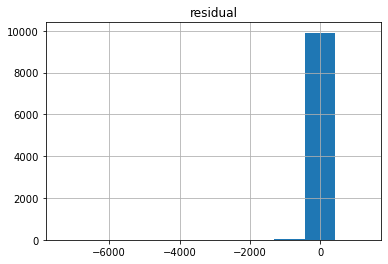

In [21]:
# Histogram of "residual" column

df_residuals.hist(column='residual')

<AxesSubplot:xlabel='predicted', ylabel='actual'>

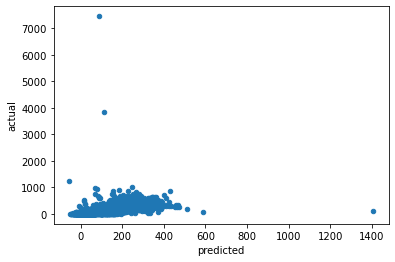

In [22]:
# Scatter plot of predicted and actual value

df_residuals.plot.scatter(x='predicted', y='actual')